In [61]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("results/full_data.csv")
df.columns

Index(['P1_neighborhood_completeness', 'P2_neighborhood_completeness',
       'P1_passed_go_count', 'P2_passed_go_count', 'P1_properties_owned',
       'P2_properties_owned', 'P1_risk', 'P2_risk', 'P1_total_rent_paid',
       'P2_total_rent_paid', 'P1_wealth', 'P2_wealth', 'num_rounds', 'winner',
       'is_English', 'is_Random', 'is_Vickrey'],
      dtype='object')

In [74]:
features = ['P1_neighborhood_completeness', 'P2_neighborhood_completeness',
       'P1_passed_go_count', 'P2_passed_go_count', 'P1_properties_owned',
       'P2_properties_owned', 'P1_risk', 'P2_risk', 'P1_total_rent_paid',
       'P2_total_rent_paid', 'num_rounds',
       'is_English', 'is_Random', 'is_Vickrey']

In [75]:
X = df[features]
y = df['winner']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [77]:
X_train

,P1_neighborhood_completeness,P2_neighborhood_completeness,P1_passed_go_count,P2_passed_go_count,P1_properties_owned,P2_properties_owned,P1_risk,P2_risk,P1_total_rent_paid,P2_total_rent_paid,num_rounds,is_English,is_Random,is_Vickrey
91006,0.0,0.0,2,2,8,4,1,-1,0,38,16,0,0,1
84844,0.0,0.0,1,2,5,6,-1,1,8,18,12,0,1,0
18238,1.0,0.0,3,1,9,3,1,-1,0,25,17,1,0,0
96992,0.0,1.0,2,3,6,6,0,1,12,0,18,0,0,1
19780,2.0,0.0,4,5,10,6,1,-1,24,52,32,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129130,0.0,0.0,2,3,5,8,-1,1,32,49,23,0,0,1
119906,0.0,1.0,4,5,8,6,1,1,34,60,28,0,0,1
17730,1.0,0.0,2,1,7,5,1,-1,56,0,17,1,0,0
28030,0.0,0.0,2,2,6,5,1,1,2,35,14,1,0,0


In [ ]:
from collections import Counter
Counter(y_train)

Counter({1: 53552, 2: 54448})

In [83]:
clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.72      0.72     13264
           2       0.73      0.74      0.73     13736

    accuracy                           0.73     27000
   macro avg       0.73      0.73      0.73     27000
weighted avg       0.73      0.73      0.73     27000



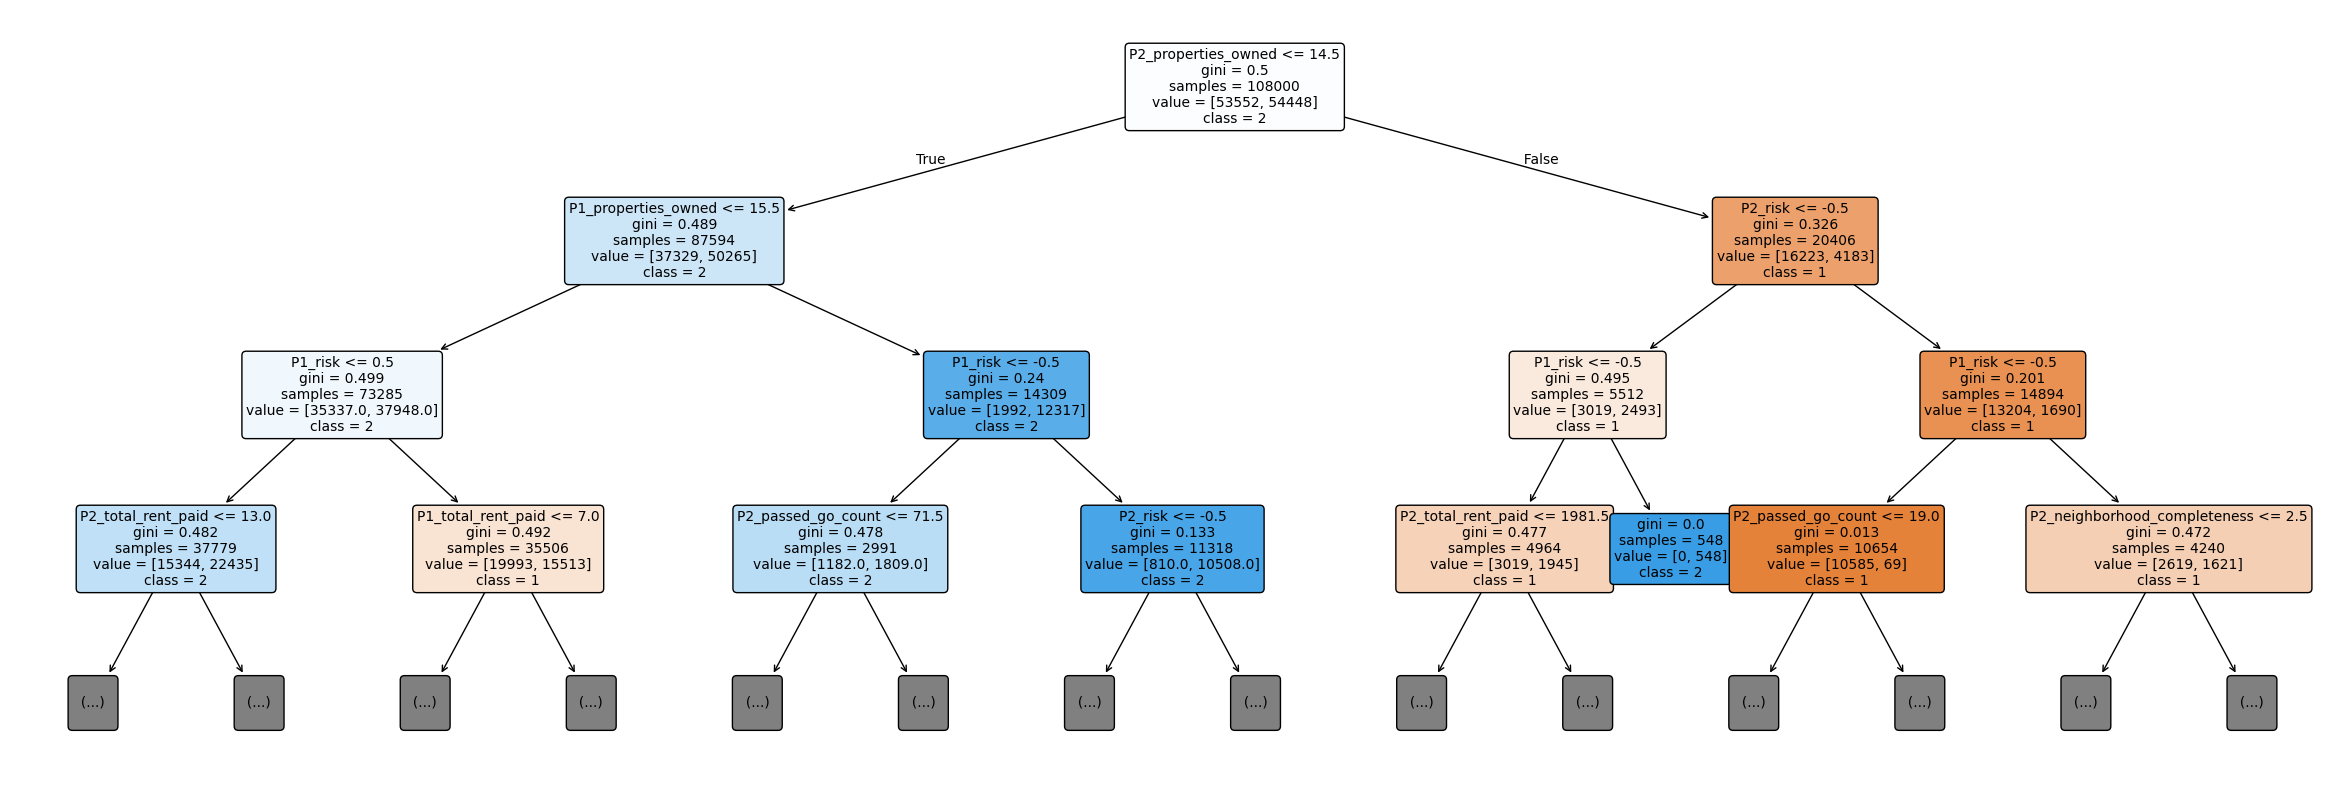

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(clf, feature_names=X.columns, 
          class_names=["1", "2"], 
          filled=True, 
          rounded=True, 
          fontsize=10,
          max_depth=3)
plt.show()

In [87]:
import pickle
with open('results/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)